In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def assign(point, centers):
    dis = np.linalg.norm(centers - point, axis=1)
    return np.argmin(dis)


def k_means(points, n_clusters, iter=300):
    # 设置若中心点移动距离不大提前停止
    early_stop = 1e-18
    # 将数据转化为浮点数数组
    points = np.array(points, dtype=np.float64)
    # 获取维度以及每个特征的取值范围
    samples, dims = points.shape
    low = np.min(points, axis=0)
    high = np.max(points, axis=0)

    # 随机生成初始中心点
    centers = np.random.uniform(low, high, (n_clusters, dims))

    for i in range(iter):
        clusters = np.array([assign(p, centers) for p in points])
        old_centers = np.array(centers)
        for j in range(n_clusters):
            points_in_cluster_j = points[clusters == j]
            centers[j] = np.mean(points_in_cluster_j, axis=0)

        if np.sum(np.linalg.norm(old_centers - centers, axis=1) < early_stop):
            print(i)
            print(old_centers)
            print(centers)
            break

    return clusters    

In [12]:
data = pd.read_csv(os.path.join('data', 'data.csv'))
# data = pd.read_csv('data/data.csv')
data = data[['Q' + str(i) for i in range(13, 29)]]

labels = k_means(data, n_clusters=8)
labels

6
[[1.05163043 1.03668478 1.02853261 1.01222826 1.08831522 1.0298913
  1.03125    1.02173913 1.02853261 1.03125    1.01902174 1.01902174
  1.03940217 1.02717391 1.02309783 1.02853261]
 [4.9064143  4.93059937 4.93690852 4.89905363 4.95688749 4.92954784
  4.95373291 4.97581493 4.96845426 4.98002103 4.93796004 4.87802313
  4.95478444 4.9064143  4.83806519 4.95478444]
 [2.86206897 3.17241379 3.15270936 2.54679803 3.98522167 2.70935961
  3.43842365 3.72906404 4.00492611 3.94581281 3.46305419 3.18719212
  3.91625616 3.48768473 3.51231527 4.00985222]
 [1.93491124 1.96646943 2.04142012 1.91518738 2.14792899 1.92307692
  1.98027613 2.00986193 2.08678501 2.10848126 2.00197239 2.00197239
  2.11242604 2.06311637 2.01577909 2.08481262]
 [2.9735376  2.99721448 2.98467967 2.98398329 3.01880223 2.98328691
  2.98050139 2.97284123 2.98955432 2.99721448 2.98746518 3.00208914
  3.0097493  2.98816156 2.99373259 3.01183844]
 [2.56830601 2.90710383 2.8852459  2.01092896 3.82513661 2.32240437
  2.46994536 2.3

array([4, 4, 1, ..., 1, 0, 0], dtype=int64)

In [4]:
tsne_2=TSNE(n_components=2, metric='euclidean', init='pca')
X_tnse_2d = tsne_2.fit_transform(data)

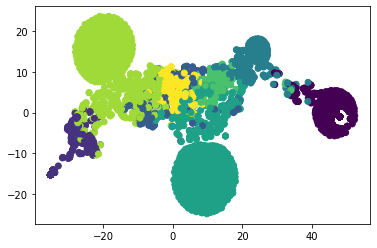

In [13]:
plt.scatter(X_tnse_2d[:, 0], X_tnse_2d[:, 1], c=labels)
plt.show()

In [14]:
# model = KMeans(n_clusters=8, init='k-means++', n_init=10).fit(data_Q)
#y_km中保存了聚类的结果
dict={}
for key in labels:
    dict[key]=dict.get(key,0)+1
print(dict)

{4: 1445, 1: 951, 0: 736, 6: 1536, 3: 499, 5: 197, 7: 256, 2: 200}
